In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [115]:
df = pd.read_csv("../Polynomial_Linear_Regression/Position_Salaries.csv")
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [116]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 2].values

In [117]:
# X[:,0] = LabelEncoder().fit_transform(X[:,0])
# X = OneHotEncoder(categorical_features=[0]).fit_transform(X).toarray()
# X.shape

In [118]:
#drop position column
X = X[:, 1:]
X.shape, y.shape

((10, 1), (10,))

In [119]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [120]:
lin_reg = LinearRegression().fit(X,y)
lin_reg_poly = LinearRegression().fit(X_poly,y)

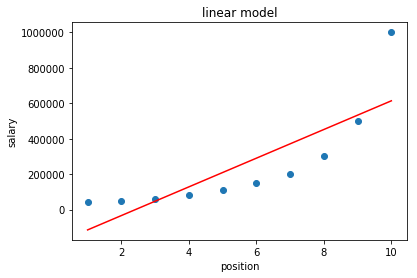

In [121]:
#plot the linear model
plt.scatter(X,y)
plt.plot(X, lin_reg.predict(X), color='red')
plt.title("linear model")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

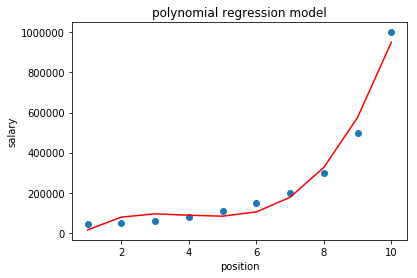

In [122]:
#plot the polynomial regression model
plt.scatter(X,y)
plt.plot(X, lin_reg_poly.predict(X_poly), color='red')
plt.title("polynomial regression model")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

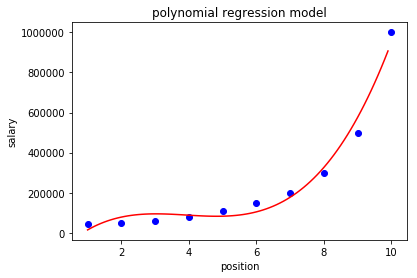

In [124]:
#Smoothing the polynomial regression model
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color='blue')
plt.plot(X_grid, lin_reg_poly.predict(poly_reg.fit_transform(X_grid)), color='red')
plt.title("polynomial regression model")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()

In [129]:
lin_reg.predict(6.5), lin_reg_poly.predict(poly_reg.fit_transform(6.5))

(array([330378.78787879]), array([133259.46969697]))